# Bucket FICO Scores

In [18]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the data
data = pd.read_csv("Task 3 and 4_Loan_Data.csv")
data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


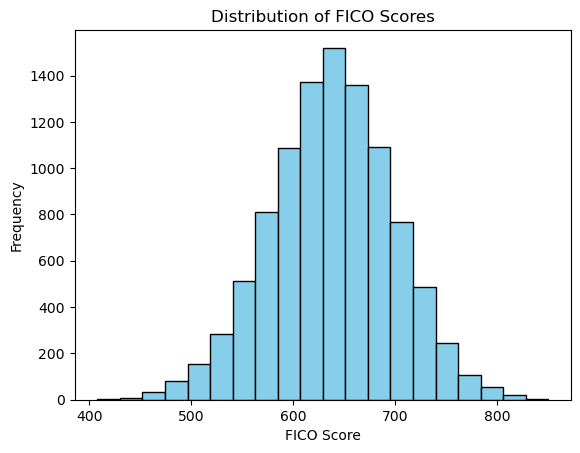

In [4]:
# Plotting distribution of FICO scores
plt.hist(data["fico_score"], bins = 20, color = "skyblue", edgecolor = "black")
plt.xlabel("FICO Score")
plt.ylabel("Frequency")
plt.title("Distribution of FICO Scores");

In [10]:
# Number and name of rating buckets
num_buckets = 5
bucket_names = ["Very Poor", "Poor", "Fair", "Good", "Very Good"]


# Sorting FICO scores in ascending order
fico_scores = data["fico_score"].sort_values()

# Calculate evenly-spaced initial boundaries
initial_boundaries = list(np.linspace(fico_scores.min(), fico_scores.max(), num_buckets+1))
initial_boundaries

[408.0, 496.4, 584.8, 673.2, 761.6, 850.0]

In [6]:
# Finding midpoints
midpoints = []
for i in range(len(initial_boundaries) - 1):
    midpoints.append((initial_boundaries[i] + initial_boundaries[i+1]) / 2)

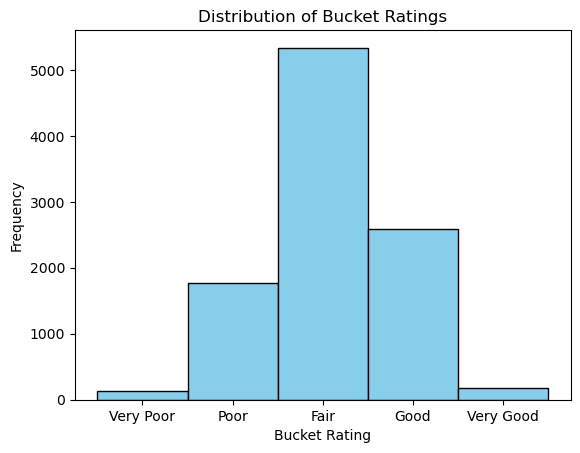

In [15]:
# Plotting distribution of buckets
plt.hist(fico_scores, bins = initial_boundaries, color = "skyblue", edgecolor = "black")
plt.xticks(midpoints, labels = bucket_names)
plt.xlabel("Bucket Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Bucket Ratings");

In [17]:
# Define FICO score ranges
score_ranges = [(350, 496.4), (496.4, 584.8), (584.8, 673.2), (673.2, 761.6), (761.6, 850)]

# Initializing a dictionary to store scores for each range
score_groups = {bucket: [] for bucket in bucket_names}

# Group scores based on their ranges
for score in fico_scores:
    for i, (start, end) in enumerate(score_ranges):
        if start <= score < end:
            score_groups[bucket_names[i]].append(score)
            break

In [20]:
# Calculate MSE for each group and store it in a dictionary
mse_scores = {}
for bucket, scores in score_groups.items():
    mean = np.mean(scores)
    mse = np.mean((scores - mean) ** 2)
    mse_scores[bucket] = mse

In [22]:
for bucket, mse in mse_scores.items():
    print(f"MSE for {bucket}: {mse}")

MSE for Very Poor: 323.2433147046451
MSE for Poor: 502.81808155782113
MSE for Fair: 613.4499051659516
MSE for Good: 496.4668622748197
MSE for Very Good: 293.27359995274105
